In [ ]:
#Import functions from problem 2.2
from functions_problems_2 import *

import random
import numpy as np
import matplotlib.pyplot as plt

#Uncomment this if you want to ignore the warning about the list with ndarrays of different sizes
#np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

#Uncomment this if you want to raise and error for the warning about the list with ndarrays of different sizes
#np.warnings.filterwarnings("error", category=np.VisibleDeprecationWarning)

In [ ]:
# Create n folds for cross validation
def cross_validation(dataset, n):

    np.random.shuffle(dataset) #shuffle the dataset
    dataset_n_folds = np.array_split(dataset, n)  #split the dataset into n folds
                                                    #array_split: can take an integer (n) that 
                                                    #does not equally divide the axis
    return dataset_n_folds

#Prediction for the parametric methods
def prediction_param(x, means, variances, classes):

    #a, b, c:
    pred_list = []
    #all_methods_probabilities = []
    for i in range(len(means)): #for every method (#methods = 3)
        method_probabilities = []

        for j in range(len(classes)): #for every class (#classes = 2)
            
            probability = gaussian(x[:-1], means[i][j], variances[i][j]) #find the probabilities of the two classes
            method_probabilities.append(probability) #gather the 2 probabilities in a list 

        #all_methods_probabilities.append(method_probabilities) #gather the 3 2-element lists 
        pred_list.append(np.argmax(method_probabilities)) #find the index of the largest probability
    
    return pred_list #return a 3-element list with the predictions of the three methods

#Prediction for the non-parametric methods
def prediction_non_param(x, means, variances, train_set, classes):
    
    #d
    pred_list = []
    method_probabilities = []
    for j in range(len(classes)): #for every class (#classes = 2)

        probability = parzen(train_set[:, :-1], x[:-1]) #find the probability of the x vector/row of the test set for the 2 classes
        method_probabilities.append(probability) #gather the 2 probabilities in a list 
    
    pred_list.append(np.argmax(method_probabilities)) #find the index of the largest probability
    
    return pred_list #return a 1-element list with the predictions of the non-parametric method

In [ ]:
dataset, classes_labels, num_parameters = load_dataset('pima-indians-diabetes.data') #load the dataset and return the dataset, 
                                                                                        #the labels of the classes and the number of parameters

In [ ]:
n = 6 #number of folds
fold_dataset = cross_validation(dataset, n) #create the cross validation set
correct = np.zeros((n, 4)) #create nested list - n rows, 4 columns (the number of methods tested)

Average accuracy of the 4 methods using cross validation of 6 fold:
Accuracy of method A: 66.67%
Accuracy of method B: 74.22%
Accuracy of method C: 75.13%
Accuracy of method D: 65.1%


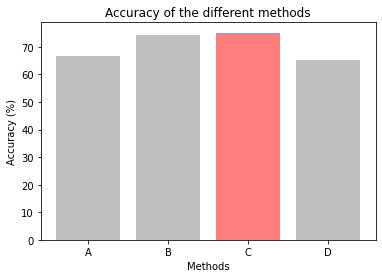

In [ ]:
for index, test_set in enumerate(fold_dataset):

    #create the training set
    dataset_copy = fold_dataset.copy() #It will give us a warning if the ndarrays have different lengths 
    del dataset_copy[index]
    train_set = np.vstack(dataset_copy)

    means_a = []
    covars_a = []
    means_b = []
    covars_b = []
    means_c = []
    covars_c = []


    for label in classes_labels: #for each class

        split_dataset = train_set[train_set[:,-1]==int(label),:-1] #Split dataset based on the class label

        #Calculate the means and the covariance metrices for the parametric methods
        mean_a, covar_a = mean_var_a(split_dataset)
        means_a.append(mean_a)
        covars_a.append(covar_a)

        mean_b, covar_b = mean_var_b(split_dataset)
        means_b.append(mean_b)
        covars_b.append(covar_b)

        mean_c, covar_c = mean_var_c(split_dataset)
        means_c.append(mean_c)
        covars_c.append(covar_c)

    #Create lists of length 3, each element is a list of the means/covariance metrices of the two classes
    means = []
    means.append(means_a)
    means.append(means_b)
    means.append(means_c)

    covars = []
    covars.append(covars_a)
    covars.append(covars_b)
    covars.append(covars_c)


    for test_row in test_set: #For each row of the test set

        #For the parametric methods
        preds = prediction_param(test_row, means, covars, classes_labels) #Get the predictions of the 3 methods for each row of the test set
        
        for pred_index in range(len(preds)):
            if test_row[-1] == preds[pred_index]:
                correct[index, pred_index] += 1

        #For the non-parametric method
        preds_d = prediction_non_param(test_row, means, covars, train_set, classes_labels) #Get the predictions of the method for each row of the test set
        #If the prediction of each method is correct +1 at the corresponding matrix coordinates
        if test_row[-1] == preds_d:
            correct[index, 3] += 1

#Get the percent accuracy
correct[:] = (correct[:] / len(test_set)) * 100
#Find the means
accuracy = correct.mean(axis=0)


print("Average accuracy of the 4 methods using cross validation of " + str(n) + " fold:")

assumptions = ["A", "B", "C", "D"]

for method in range(len(accuracy)):
    print("Accuracy of method " + assumptions[method] + ": " + str(round(accuracy[method], 2)) + "%")


#Create a bar chart with the accuracies
clrs = ['grey' if (x < max(accuracy)) else 'red' for x in accuracy ]
plt.bar(assumptions, accuracy, align = "center", alpha=0.5, color = clrs)
plt.xlabel("Methods")
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of the different methods')

plt.show()
